In [11]:
# import libraries


from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [12]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [18]:
!unzip /content/Dataset.zip

Archive:  /content/Dataset.zip
   creating: Dataset/Test/
   creating: Dataset/Test/Parasite/
 extracting: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_10.png  
 extracting: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_11.png  
  inflating: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_12.png  
 extracting: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_13.png  
 extracting: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_14.png  
  inflating: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_15.png  
 extracting: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_16.png  
 extracting: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_17.png  
 extracting: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_18.png  
 extracting: Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_19.png  
 extracting: Dat

In [19]:
import os
os.listdir('/content/Dataset')

['Test', 'Train']

In [20]:
os.listdir('/content/Dataset/Train')

['Parasite', 'Uninfected']

In [21]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/Dataset/Train'
valid_path = '/content/Dataset/Test'

In [22]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80134624/80134624 [==============================] - 5s 0us/step


In [23]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [24]:
 # useful for getting number of output classes
folders = glob('/content/Dataset/Train/*')

In [25]:
folders

['/content/Dataset/Train/Parasite', '/content/Dataset/Train/Uninfected']

In [44]:
os.listdir('/content/Dataset/Train/Uninfected')

['C1_thinF_IMG_20150604_104919_cell_82.png',
 'C1_thinF_IMG_20150604_104942_cell_20.png',
 'C2NThinF_IMG_20150604_114815_cell_66.png',
 'C241NThinF_IMG_20151207_124358_cell_144.png',
 'C3thin_original_IMG_20150608_163047_cell_236.png',
 'C1_thinF_IMG_20150604_105100_cell_69.png',
 'C3thin_original_IMG_20150608_163029_cell_121.png',
 'C2NThinF_IMG_20150604_114815_cell_9.png',
 'C241NThinF_IMG_20151207_124358_cell_130.png',
 'C241NThinF_IMG_20151207_124358_cell_35.png',
 'C241NThinF_IMG_20151207_124358_cell_73.png',
 'C1_thinF_IMG_20150604_105100_cell_186.png',
 'C2NThinF_IMG_20150604_114751_cell_197.png',
 'C2NThinF_IMG_20150604_115238_cell_126.png',
 'C1_thinF_IMG_20150604_104722_cell_66.png',
 'C241NThinF_IMG_20151207_124643_cell_46.png',
 'C2NThinF_IMG_20150604_114815_cell_242.png',
 'C2NThinF_IMG_20150604_114751_cell_181.png',
 'C2NThinF_IMG_20150604_114751_cell_106.png',
 'C241NThinF_IMG_20151207_124240_cell_169.png',
 'C3thin_original_IMG_20150608_163047_cell_212.png',
 'C1_thinF_

In [26]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [27]:
prediction = Dense(len(folders), activation='softmax')(x)


In [28]:
# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [29]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras.layers import MaxPooling2D

In [ ]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [30]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [31]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [32]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [ ]:
training_set

In [33]:
test_set = test_datagen.flow_from_directory('/content/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [34]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-34-04ffb29a66a7>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
13/13 [==============================] - 22s 606ms/step - loss: 1.5534 - accuracy: 0.5000 - val_loss: 1.5445 - val_accuracy: 0.3507
Epoch 2/10
13/13 [==============================] - 6s 431ms/step - loss: 0.5831 - accuracy: 0.6899 - val_loss: 0.5571 - val_accuracy: 0.6866
Epoch 3/10
13/13 [==============================] - 6s 490ms/step - loss: 0.4256 - accuracy: 0.8029 - val_loss: 0.6603 - val_accuracy: 0.6343
Epoch 4/10
13/13 [==============================] - 6s 437ms/step - loss: 0.4328 - accuracy: 0.7909 - val_loss: 0.4931 - val_accuracy: 0.7388
Epoch 5/10
13/13 [==============================] - 6s 475ms/step - loss: 0.3787 - accuracy: 0.8173 - val_loss: 0.4110 - val_accuracy: 0.7761
Epoch 6/10
13/13 [==============================] - 6s 434ms/step - loss: 0.2963 - accuracy: 0.8750 - val_loss: 0.4063 - val_accuracy: 0.8209
Epoch 7/10
13/13 [==============================] - 7s 516ms/step - loss: 0.2718 - accuracy: 0.8966 - val_loss: 0.3729 - val_accuracy: 0.7836
Epoch

In [ ]:
import matplotlib.pyplot as plt

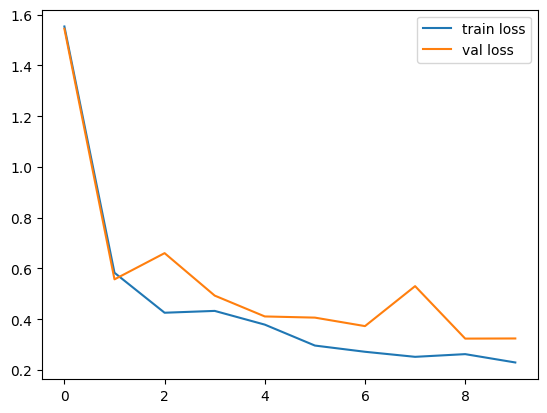

<Figure size 640x480 with 0 Axes>

In [35]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


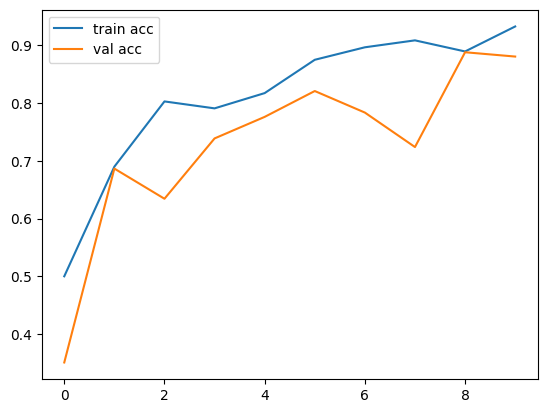

<Figure size 640x480 with 0 Axes>

In [36]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [37]:
 #save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')


In [38]:
y_pred = model.predict(test_set)

5/5 [==============================] - 1s 147ms/step


In [39]:
y_pred

array([[2.3108511e-01, 7.6891494e-01],
       [4.8127097e-01, 5.1872903e-01],
       [7.7800316e-01, 2.2199684e-01],
       [9.9757856e-01, 2.4214529e-03],
       [6.7101604e-01, 3.2898390e-01],
       [4.7190180e-01, 5.2809817e-01],
       [2.8638893e-01, 7.1361107e-01],
       [7.5065488e-01, 2.4934512e-01],
       [1.9270255e-01, 8.0729747e-01],
       [3.2986230e-01, 6.7013770e-01],
       [1.7470685e-01, 8.2529312e-01],
       [4.3296045e-01, 5.6703961e-01],
       [9.8610222e-01, 1.3897719e-02],
       [9.5407933e-01, 4.5920666e-02],
       [5.3789610e-01, 4.6210387e-01],
       [6.1444455e-01, 3.8555545e-01],
       [9.9740821e-01, 2.5918051e-03],
       [1.5236700e-01, 8.4763294e-01],
       [9.8538870e-01, 1.4611324e-02],
       [9.9737275e-01, 2.6272149e-03],
       [7.8512347e-01, 2.1487655e-01],
       [8.6951685e-01, 1.3048317e-01],
       [7.1753317e-01, 2.8246683e-01],
       [1.9217710e-01, 8.0782288e-01],
       [2.4691990e-01, 7.5308013e-01],
       [5.2670680e-02, 9.

In [40]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [41]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [42]:
model=load_model('model_vgg19.h5')

In [48]:
img=image.load_img('/content/Dataset/Train/Uninfected/C1_thinF_IMG_20150604_104919_cell_82.png',target_size=(224,224))

In [49]:
x=image.img_to_array(img)

In [50]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [51]:
model.predict(img_data)

1/1 [==============================] - 1s 753ms/step


array([[9.9981862e-01, 1.8138453e-04]], dtype=float32)

In [52]:

a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 28ms/step


In [54]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")



Infected
